<b>Previsão do Mercado Financeiro Brasileiro (Índice Bovespa) com o uso de Regressão Linear</b>

O objetivo deste notebook é demonstrar um exemplo de previsão do mercado financeiro brasileiro, representado por meio do índice bovespa (Ibovespa), com a técnica de Machine Learning denominada Regressão Linear. Para isso, utilizamos a linguagem de programação Python e as bibliotecas Pandas, Matplotlib Finance, Numpy e Scikit Learn. 

As seguintes etapas foram desenvolvidas:
1. Carregamento e exibição dos dados
2. Pré-processamento dos dados
3. Criação do modelo
4. Previsão

https://medium.com/@arthuremanuel.carosia

<b>Carregando e exibindo dados do mercado</b>

In [67]:
import pandas as pd

stocks = pd.read_csv('./Data/Stocks/^BVSP.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date', inplace=True)
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,115133.0,115171.0,114526.0,115121.0,115121.0,6887400.0
2019-12-23,115119.0,115863.0,114964.0,115863.0,115863.0,3995200.0
2019-12-26,115864.0,117220.0,115673.0,117203.0,117203.0,3788900.0
2019-12-27,117205.0,117803.0,115995.0,116534.0,116534.0,3905900.0
2019-12-30,116530.0,117086.0,115790.0,115964.0,115964.0,3667900.0


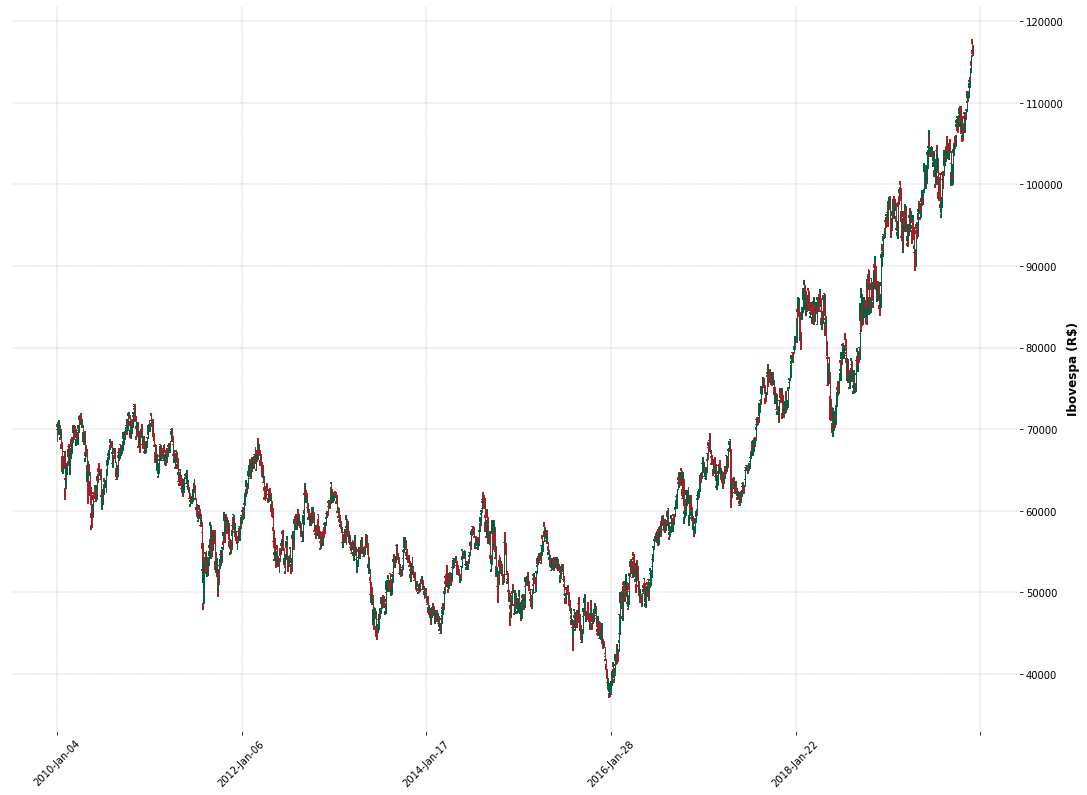

In [42]:
import mplfinance as mpf
graph = stocks.copy()
mpf.plot(graph, type='candle', figscale=2.5, volume=False, style='charles', ylabel='Ibovespa (R$)')

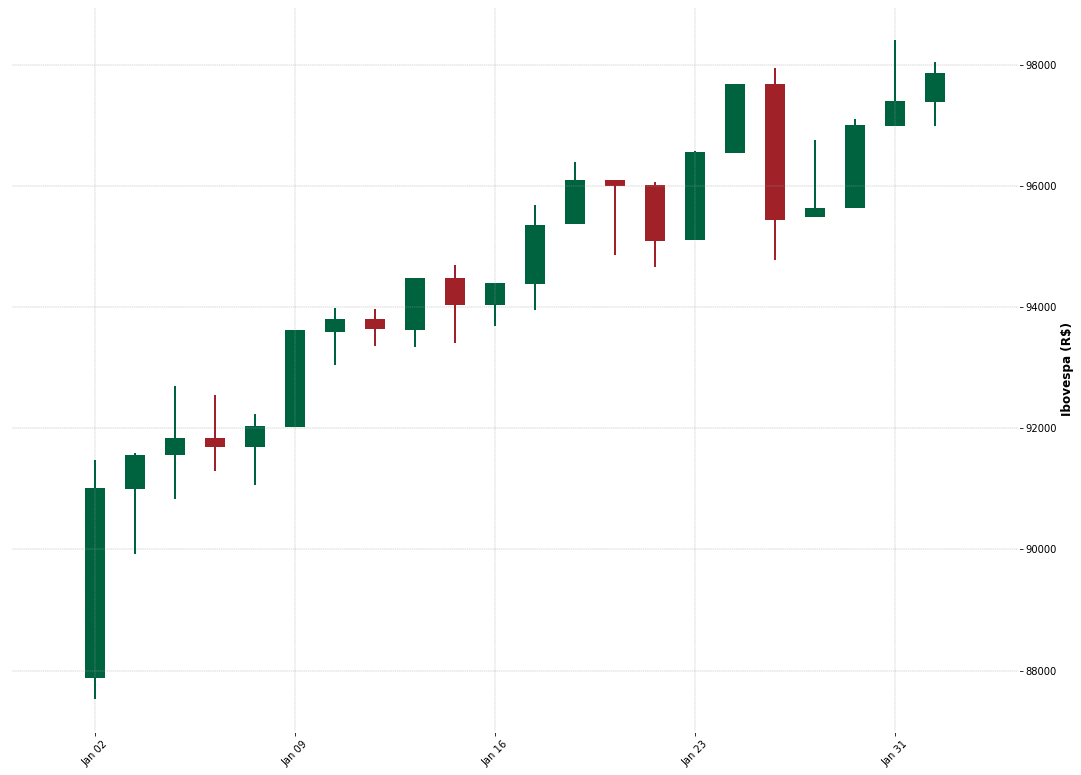

In [43]:
mpf.plot(graph[pd.to_datetime('01-01-2019'):pd.to_datetime('02-01-2019')], type='candle', figscale=2.5, volume=False, style='charles', ylabel='Ibovespa (R$)')

In [44]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03
mean,64758.895269,65353.416498,64172.198544,64775.636474,64775.636474,3.454987e+06
std,15743.814350,15824.706369,15683.607588,15776.408177,15776.408177,1.410410e+06
min,37501.000000,38031.000000,37046.000000,37497.000000,37497.000000,0.000000e+00
25%,53570.000000,54113.000000,53028.000000,53570.000000,53570.000000,2.597900e+06
50%,61020.000000,61543.000000,60489.000000,61022.000000,61022.000000,3.323700e+06
75%,70429.000000,70904.000000,69947.000000,70451.000000,70451.000000,4.164800e+06
max,117205.000000,117803.000000,115995.000000,117203.000000,117203.000000,1.423340e+07


In [45]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2480 entries, 2010-01-04 to 2019-12-30
Data columns (total 6 columns):
Open         2473 non-null float64
High         2473 non-null float64
Low          2473 non-null float64
Close        2473 non-null float64
Adj Close    2473 non-null float64
Volume       2473 non-null float64
dtypes: float64(6)
memory usage: 135.6 KB


<b>Limpando os dados nulls</b>

In [46]:
stocks_null = stocks[stocks.Open.isnull()]
stocks_null

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-15,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-20,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
stocks = stocks.drop(stocks_null.index)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2473 entries, 2010-01-04 to 2019-12-30
Data columns (total 6 columns):
Open         2473 non-null float64
High         2473 non-null float64
Low          2473 non-null float64
Close        2473 non-null float64
Adj Close    2473 non-null float64
Volume       2473 non-null float64
dtypes: float64(6)
memory usage: 135.2 KB


<b>Preparando o modelo de regressão linear</b>

In [48]:
#X deve estar um dia atrás de y
x = stocks['Close'].tolist()
x.pop()
len(x)

2472

In [49]:
#Y deve estar Um dia à frente de x
y = stocks['Close'].shift(-1).tolist()
y.pop()
len(y)

2472

In [50]:
import numpy as np
x = np.asarray(x)
y = np.asarray(y)

In [66]:
#Dividindo os dados de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.25, shuffle = False)

from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(X_train, y_train)
print('Score\t', clf.score(X_test, y_test))

Score	 0.9924623616465346


<b>Teste com dados dos primeiros dias de Janeiro de 2020</b>

In [90]:

close_test = np.asarray([118573.00,117707.00,116878.00,116662.00,116247.00,115947.00])

print(clf.predict([[118573.00]]))

for value in close_test:
    p = clf.predict(value.reshape(-1, 1))
    if p > value: print(value, ' Up to ', p)
    else: print(value, ' Down to ', p)

[[118151.37439617]]
118573.0  Down to  [[118151.37439617]]
117707.0  Down to  [[117291.27723879]]
116878.0  Down to  [[116467.92788144]]
116662.0  Down to  [[116253.40018399]]
116247.0  Down to  [[115841.22891342]]
115947.0  Down to  [[115543.27377807]]
